# Random Forests -- One Family vs Others

 * It is possible to find random forests that classify Niger-Congo or Austronesian with good accuracy (f-measure 0.8 \-- 0.9) \-- Out[4], Out[16]
 

 * If no restriction is imposed on the WALS area, we get mostly word order featues.
 

 * Taking only phonology featues, we can find some good random forests too \-- Out[22]
 

 * Looking at all the possible groups (not just those with good silhouttes) we can see that clustring is correlated with the RF accuracy \-- In [12]
 
 
 * As for the important featues, at least in the sampled groups, it seems that they are different for Niger-Congo and Austronesian \-- In[9], In[21]

In [1]:
from locator import *
import seaborn as sns
%matplotlib inline

In [2]:
nig04 = pd.read_pickle('feature-sets/800-Niger-80-04.pkl')
nigrnd = pd.read_pickle('feature-sets/800-Niger-80-rnd.pkl')

nig04 = [ColGroup(g) for g in nig04]
nigrnd = [ColGroup(g) for g in nigrnd]

In [15]:
def rfstats(column_groups,family):
    #groups = [ColGroup(g) for g in column_groups]
    stats = pd.DataFrame(index=range(len(column_groups)), \
        columns=['oob','precision','recall','f-measure','rerror','silhouette'])
    key = 'family: '+family+' vs others'
    for i,g in enumerate(column_groups):
        g.gen_separation(family=family)
        g.random_forests(supp='family',suppv=family)
        stats.iloc[i][g.rfs_data[key].columns] = g.rfs_data[key].mean()
        stats.iloc[i]['silhouette'] = g.best_silhouette(family)[0]
    return stats.astype(float)

## Good Silhouettes:
### Criteria:
    
  1. No area restriction
  
  2. At least 80 Niger-Congo
  
  3. At least 800 total
  
  4. At least 0.4 Silhoutte of Niger-Congo vs. Others
  
  
### General Statistics:

In [4]:
stats = rfstats(nig04,"Niger-Congo")
stats.describe()

,oob,precision,recall,f-measure,rerror,silhouette
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.155744,0.807964,0.905588,0.853223,0.094412,0.418840
std,0.025597,0.025864,0.037763,0.025218,0.037763,0.020894
min,0.119091,0.717984,0.768539,0.784218,0.058929,0.400126
25%,0.138345,0.787614,0.896515,0.840642,0.072114,0.404976
50%,0.150455,0.810923,0.918799,0.858750,0.081201,0.411001
75%,0.170767,0.826500,0.927886,0.870129,0.103485,0.426984
max,0.222314,0.859636,0.941071,0.887357,0.231461,0.509783


## Relation to Silhouette

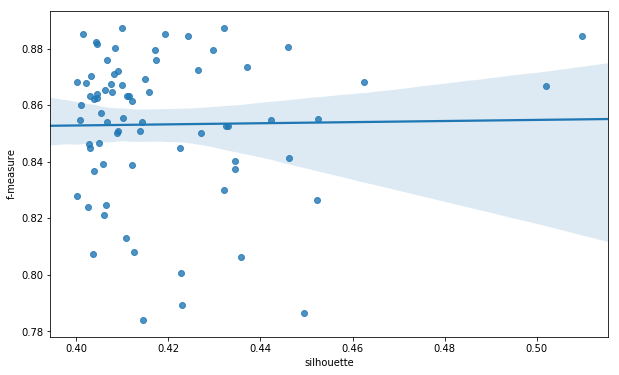

In [5]:
fig,ax  = plt.subplots(figsize=(10,6))
sns.regplot(x="silhouette", y="f-measure", data=stats, ax=ax);

There is no correlation, but it isn't surprising since these are only good silhouttes. See a better test below.

In [6]:
stats.corr()

,oob,precision,recall,f-measure,rerror,silhouette
oob,1.000000,-0.849503,-0.705376,-0.983323,0.705376,-0.019493
precision,-0.849503,1.000000,0.228340,0.742700,-0.228340,0.054605
recall,-0.705376,0.228340,1.000000,0.820918,-1.000000,-0.018546
f-measure,-0.983323,0.742700,0.820918,1.000000,-0.820918,0.016310
rerror,0.705376,-0.228340,-1.000000,-0.820918,1.000000,0.018546
silhouette,-0.019493,0.054605,-0.018546,0.016310,0.018546,1.000000


In [7]:
nig04.sort(key=lambda g : g.family_rfs_data['Niger-Congo']['oob'].mean())

### Details of the Best Three Feature Groups
best by out of bag cross validationm, it's almost the same as f-measure (see the correlations table above)

In [9]:
for g in nig04[:3]:
    print(g)
    print('feature importances')
    print(g.get_rforest_data('importance'))
    print("---\n\n")

4 long group covering 869 languages
in mode PCA:
quality index: 8.12
PC1: 25%
PC2: 21%
fields: 'word_order': 4
features:
143A Order of Negative Morpheme and Verb
81A Order of Subject, Object and Verb
89A Order of Numeral and Noun
97A Relationship between the Order of Object and Verb and the Order of Adjective and Noun
family1: 131 (Austronesian)
family2: 110 (Niger-Congo)
silhouettes:
Niger-Congo: 0.51 (1 PCs)
Niger-Congo vs others: oob: 0.119 f-measure: 0.884 (5 samples)

feature importances
       Niger-Congo     other  MeanDecreaseAccuracy  MeanDecreaseGini
X143A     0.020947  0.020887              0.020772         15.264760
X81A      0.203496  0.112020              0.156075         31.298250
X89A      0.174185  0.084053              0.128274         20.954456
X97A      0.068349  0.015999              0.041609         13.399317
---


3 long group covering 911 languages
in mode PCA:
quality index: 7.42
PC1: 44%
PC2: 21%
fields: 'word_order': 3
features:
81A Order of Subject, Object a

### Niger-Congo Important features
It seems then that at least in these three groups, the important features are 81A and 89A.

## Relation to Silhouette in General
### Criteria:
    
  1. No area restriction
  
  2. At least 80 Niger-Congo
  
  3. At least 800 total

### Groups: a random sample of 1000 groups of meeting these criteria
  

In [22]:
rndstats = pd.read_pickle('tmp1000rndnigstats.pkl')
#rndstats = rfstats(nigrnd,"Niger-Congo")
rndstats.describe()

,oob,precision,recall,f-measure,rerror,silhouette
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.189828,0.788512,0.851713,0.817023,0.148287,0.238969
std,0.036014,0.034780,0.063378,0.037685,0.063378,0.068204
min,0.108943,0.614439,0.645545,0.662899,0.034940,0.065045
25%,0.166667,0.774269,0.814702,0.796765,0.096412,0.194786
50%,0.185502,0.792775,0.862436,0.823209,0.137564,0.250002
75%,0.207646,0.811182,0.903588,0.843551,0.185298,0.284846
max,0.367901,0.862069,0.965060,0.896297,0.354455,0.436989


In [11]:
#with open('tmp1000rndnigstats.pkl','wb') as f:
#    pickle.dump(rndstats,f)

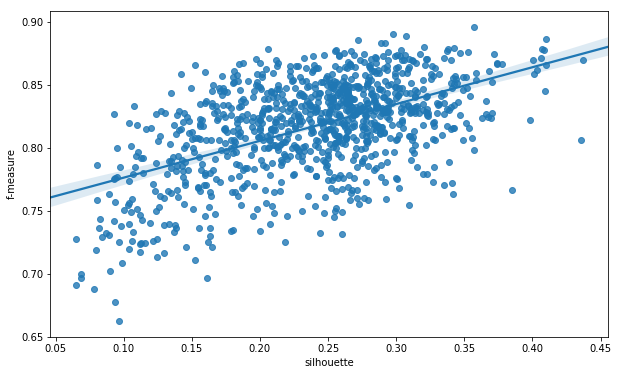

In [12]:
fig,ax  = plt.subplots(figsize=(10,6))
sns.regplot(x="silhouette", y="f-measure", data=rndstats, ax=ax);

In [13]:
rndstats.corr()

,oob,precision,recall,f-measure,rerror,silhouette
oob,1.000000,-0.772618,-0.716462,-0.970897,0.716462,-0.467987
precision,-0.772618,1.000000,0.116933,0.603923,-0.116933,0.179215
recall,-0.716462,0.116933,1.000000,0.860160,-1.000000,0.553232
f-measure,-0.970897,0.603923,0.860160,1.000000,-0.860160,0.528154
rerror,0.716462,-0.116933,-1.000000,-0.860160,1.000000,-0.553232
silhouette,-0.467987,0.179215,0.553232,0.528154,-0.553232,1.000000


So good random forest classification is positively correlated with silhouette.


## Could The Good Forests Be Obtained On a Bogus Family?

**select a random list of languages as a bogus family**: 

In [17]:
loi = list(wals['Name'].sample(len(wals[wals['family']=='Niger-Congo'])))

**set this family in the wals table as if real**:

In [9]:
wals['family'] = wals.apply(lambda r: 'Bogus' if r['Name'] in loi else r["Name"],axis=1) 

** run the exact same method on "Bogus" **:

In [16]:
bogus_rndstats = rfstats(nigrnd,"Bogus")

In [18]:
bogus_rndstats.describe()

,oob,precision,recall,f-measure,rerror,silhouette
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.509484,0.490743,0.487871,0.487209,0.512129,0.001058
std,0.028521,0.029236,0.046810,0.033530,0.046810,0.005637
min,0.419835,0.331313,0.290741,0.307777,0.343548,-0.006665
25%,0.488774,0.470882,0.457549,0.465876,0.484415,-0.002649
50%,0.508585,0.491134,0.485958,0.487804,0.514042,-0.000364
75%,0.528853,0.511900,0.515585,0.508704,0.542451,0.003214
max,0.630556,0.583162,0.656452,0.580906,0.709259,0.033175


So, Over the same set of 1000 feature groups selected at random from some 15000 groups that have at least 80 Niger-Congo languages, we can't find a random forest that classifies "Bogus" with a better f-measure than 0.58, and the average f-measure is 0.48 for Bogus vs. 0.81 for Niger-Congo. 

True, these groups are not based on a scan that requires a minimum of 80 Bogus, but I don't think it matters much.

In[28] shows the count statistics for Bogus over the tested set of 1000 feature groups

### Significance:

In [24]:
from scipy.stats import ttest_ind
ttest_ind(rndstats['f-measure'],bogus_rndstats['f-measure'])

Ttest_indResult(statistic=206.76172632656977, pvalue=0.0)

In [28]:
bog = list()
for g in nigrnd:
    d = g.get_table()
    bog.append(len(d[d['family'] == 'Bogus']))
bog = pd.Series(bog)
bog.describe()

count    1000.000000
mean      120.117000
std         9.561733
min       107.000000
25%       114.000000
50%       118.000000
75%       125.000000
max       165.000000
dtype: float64

## Austronesian

In [14]:
rndstats_aus = rfstats(nigrnd,"Austronesian")

In [15]:
with open('tmp1000rndausstats.pkl','wb') as f:
    pickle.dump(rndstats_aus,f)

In [16]:
rndstats_aus.describe()

,oob,precision,recall,f-measure,rerror,silhouette
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.245277,0.723893,0.828541,0.771639,0.171459,0.213034
std,0.025420,0.029391,0.034817,0.023445,0.034817,0.063450
min,0.163441,0.587312,0.369118,0.479107,0.079687,0.035093
25%,0.232308,0.707598,0.809160,0.760217,0.148092,0.168672
50%,0.246002,0.721557,0.830341,0.771967,0.169659,0.220535
75%,0.258453,0.735956,0.851908,0.784685,0.190840,0.258868
max,0.400735,0.818225,0.920312,0.841522,0.630882,0.381682


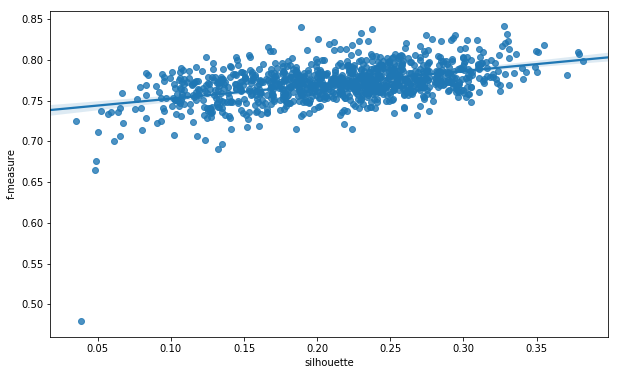

In [17]:
fig,ax  = plt.subplots(figsize=(10,6))
sns.regplot(x="silhouette", y="f-measure", data=rndstats_aus, ax=ax);

In [21]:
nigrnd.sort(key=lambda g : g.family_rfs_data['Austronesian']['oob'].mean())
for g in nigrnd[:3]:
    print(g)
    print('feature importances')
    print(g.get_rforest_data('importance'))
    print("---\n\n")

5 long group covering 959 languages
in mode PCA:
quality index: 5.94
PC1: 33%
PC2: 17%
fields: 'word_order': 4, 'verbal_categories': 1
features:
143E Preverbal Negative Morphemes
143G Minor morphological means of signaling negation
69A Position of Tense-Aspect Affixes
82A Order of Subject and Verb
83A Order of Object and Verb
family1: 96 (Niger-Congo)
family2: 93 (Austronesian)
silhouettes:
Austronesian: 0.33 (1 PCs)
Austronesian vs others: oob: 0.163 f-measure: 0.842 (5 samples)

feature importances
       Austronesian     other  MeanDecreaseAccuracy  MeanDecreaseGini
X143E      0.039503  0.018665              0.028753          6.594521
X143G      0.000000  0.000000              0.000000          0.290364
X69A       0.239223  0.204391              0.220044         32.528328
X82A       0.012100  0.013446              0.012556          3.533550
X83A       0.044885  0.034732              0.039572         11.727002
---


5 long group covering 816 languages
in mode PCA:
quality index: 8.58

### Austronesian Important Features
For Austronesian, it seems, the important features are 143A and 69A

## Just Phonology

In [18]:
loi = list(wals[wals['family']=='Niger-Congo']['Name'])
loc = Locator(110,include='phonology',loi=loi,loi_count=55,asess=None)
loc.main('discard')

checking 0.4K feature groups of length 2
Percent: [##################################################] 100% skipped:0.0K passed: 36
checking 1.4K feature groups of length 3
Percent: [##################################################] 100% skipped:0.0K passed: 84
checking 5.0K feature groups of length 4
Percent: [##################################################] 100% skipped:0.0K passed: 126
checking 10.1K feature groups of length 5
Percent: [##################################################] 100% skipped:0.0K passed: 126
checking 12.6K feature groups of length 6
Percent: [##################################################] 100% skipped:0.0K passed: 84
checking 10.1K feature groups of length 7
Percent: [##################################################] 100% skipped:0.0K passed: 36
checking 5.0K feature groups of length 8
Percent: [##################################################] 100% skipped:0.0K passed: 9
checking 1.4K feature groups of length 9
Percent: [#####################

In [20]:
phonstats = rfstats(loc.flagged,'Niger-Congo')

/home/ilay/WALS/wals-project/locator.py:873: RuntimeWarning: invalid value encountered in double_scalars
  fmeas  =  (2 * prec * rec)/(prec + rec)


In [22]:
phonstats.describe()

,oob,precision,recall,f-measure,rerror,silhouette
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,0.238467,0.769034,0.771558,0.765058,0.228442,0.219984
std,0.071504,0.089142,0.079617,0.059270,0.079617,0.096996
min,0.141818,0.239683,0.300000,0.427473,0.000000,-0.083182
25%,0.194643,0.719470,0.725000,0.736285,0.174545,0.159479
50%,0.216364,0.791314,0.782143,0.771011,0.217857,0.211596
75%,0.266071,0.821509,0.825455,0.806949,0.275000,0.282365
max,0.766667,0.984068,1.000000,0.859300,0.700000,0.544176


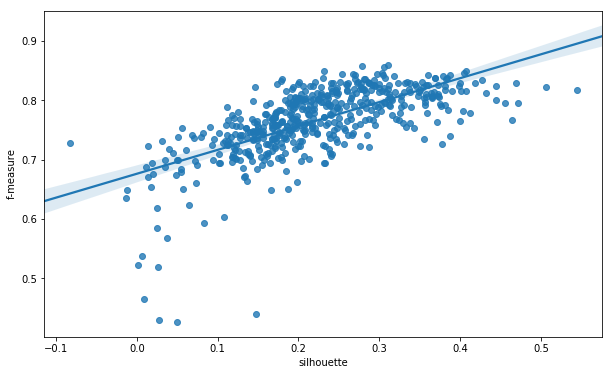

In [23]:
fig,ax  = plt.subplots(figsize=(10,6))
sns.regplot(x="silhouette", y="f-measure", data=phonstats, ax=ax);

In [24]:
loc.flagged.sort(key=lambda g : g.family_rfs_data['Niger-Congo']['oob'].mean())
for g in loc.flagged[:3]:
    print(g)
    print('feature importances')
    print(g.get_rforest_data('importance'))
    print("---\n\n")

6 long group covering 523 languages
in mode PCA:
quality index: 5.19
PC1: 17%
PC2: 12%
fields: 'phonology': 6
features:
13A Tone
19A Presence of Uncommon Consonants
1A Consonant Inventories
4A Voicing in Plosives and Fricatives
6A Uvular Consonants
7A Glottalized Consonants
family1: 55 (Niger-Congo)
family2: 42 (Austronesian)
silhouettes:
Niger-Congo: 0.31 (1 PCs)
Niger-Congo vs others: oob: 0.142 f-measure: 0.859 (5 samples)

feature importances
      Niger-Congo     other  MeanDecreaseAccuracy  MeanDecreaseGini
X13A     0.160185  0.108715              0.131850         16.260272
X19A     0.086195  0.108335              0.095830         13.157258
X1A      0.001240  0.006027              0.004006          3.699074
X4A      0.046465  0.030975              0.038365          7.306332
X6A      0.022630  0.001045              0.011449          1.643631
X7A      0.008824 -0.002716              0.002581          2.939544
---


4 long group covering 527 languages
in mode PCA:
quality index: 5.1

13A -- tonality: none/simple/complex -- is very clearly the crucial feature here

In [25]:
goodphon = [g for g in loc.flagged if g.best_silhouette('Niger-Congo')[0] > 0.4]

In [26]:
len(goodphon)

17

In [27]:
rfstats(goodphon,'Niger-Congo').describe()

,oob,precision,recall,f-measure,rerror,silhouette
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,0.190053,0.800593,0.831658,0.813664,0.168342,0.441963
std,0.023629,0.030382,0.046970,0.024951,0.046970,0.039914
min,0.152727,0.728360,0.741818,0.770157,0.072727,0.401236
25%,0.180000,0.786250,0.800000,0.797076,0.141818,0.407772
50%,0.185455,0.803110,0.825455,0.820432,0.174545,0.432602
75%,0.200000,0.820276,0.858182,0.828887,0.200000,0.463806
max,0.241818,0.856381,0.927273,0.850316,0.258182,0.544176
